<a href="https://colab.research.google.com/github/20Engma/Absher-challenges-2024-SHEHAB1/blob/main/Final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  
### This notebook is designed to test the performance of our final model, which combines two models: YOLOv8 for detecting Vehicles responsible for accidents, and a CNN for assessing the severity of traffic accidents.
by SEHAB Team


Steps to Try:
1. **Download the Model Files**:
   - Download `bestt.pt` and `SEHABCNN.h5` from the project's GitHub repository.
   - Go to Files > Upload > Choose the files from your device.

2. **Download and Upload an Image**:
   - To facilitate the task, we have provided a folder called "test images" that you can use for experiments. These images are also available on the GitHub page.

3. **Run the Code**:
   - Make sure to modify the paths of the model files and the image according to where they are saved on your device or server before running the code.

In [1]:
!pip install ultralytics
import ultralytics
import torch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 kB 6.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [12]:
#import our for yolo

from ultralytics import YOLO
from PIL import Image
import os
#use yolo to detect

image = "/content/22.jpg" ,"/content/11.jpg"
model = YOLO ("/content/yolosehab.pt")
result = model.predict(source=image, conf=0.2 ,
                       save=True)




0: 640x640 1 wrong Car, 264.9ms
1: 640x640 1 Wrong-car, 264.9ms
Speed: 7.8ms preprocess, 264.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


In [6]:
from tensorflow.keras.models import load_model

# Download our cnn model
cnn_model = load_model('/content/SEHABCNN.h5')


In [18]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(250, 250))  # Adjust size according to your model's requirements
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_and_save(image_path):
    # Prepare image and predict
    img_tensor = prepare_image(image_path)
    predictions = cnn_model.predict(img_tensor)

    # Determine the class based on predictions
    if predictions[0][0] > predictions[0][1]:
        prediction_class = "major_accident"
    else:
        prediction_class = "minor_accident"

    # Load and display image with predictions
    img = image.load_img(image_path)
    plt.imshow(img)
    plt.title(f"Prediction: {prediction_class}")
    plt.axis('off')

    # Save the image in a new path
    output_path = '/content/output_images/'
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    output_file = os.path.join(output_path, os.path.basename(image_path))
    plt.savefig(output_file)
    plt.close()

    return prediction_class, output_file

#  using the function
image_path = '/content/runs/detect/predict2/22.jpg'
prediction_class, saved_image_path = predict_and_save(image_path)
print("Prediction Class:", prediction_class)
print("Saved image path:", saved_image_path)


1/1 [==============================] - 0s 115ms/step
Prediction Class: major_accident
Saved image path: /content/output_images/22.jpg


In [10]:
!pip install matplotlib IPython
#install matplotlib & IPython to Display the image


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.7 MB/s eta 0:00:00


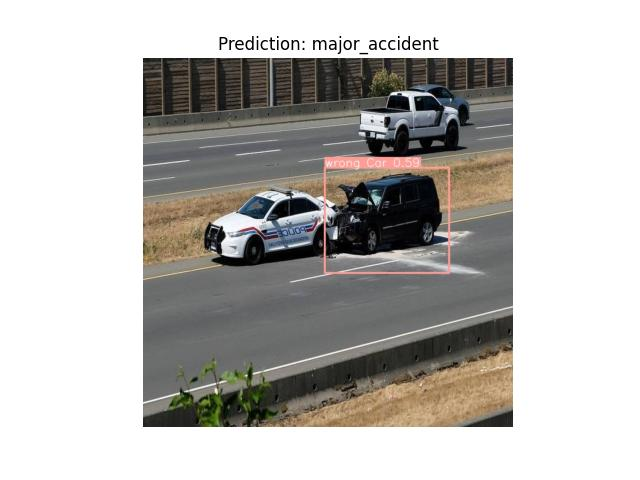

In [11]:
from IPython.display import Image, display

# Display the image
display(Image(filename='/content/output_images/22.jpg'))
